# Deep Learning 1
## PyTorch | Nuts and Bolts

### Usman Alim
Department of Computer Science
University of Calgary

ualim@ucalgary.ca

**Further Reading**
- *Deep Learning with PyTorch* by Stevens et al. (Chapters 1,2, 3, 5 and 6) [[UCalgary library link]](https://ucalgary.primo.exlibrisgroup.com/permalink/01UCALG_INST/46l39d/alma991028338404304336)
- *[Deep Learning](https://www.deeplearningbook.org/)* by Goodfellow, Benjio and Courville (Chapter 6)

<p style='font-size: 14px;'>
Images carrying a &dagger; symbol are courtesy of the book *Deep Learning with PyTorch* by Stevens et al.  
</p>

In [1]:
import matplotlib.pyplot as plt


import torch
from torch import nn, optim
import torchvision as tv

import numpy as np
import pandas as pd
import plotly.express as px

from ipywidgets import interact
import ipywidgets as widgets

from torch.utils.tensorboard import SummaryWriter

print(torch.__version__)
print(torch.cuda.is_available())
if torch.cuda.is_available():
    print(torch.cuda.get_device_properties(device=0))

2.0.1
True
_CudaDeviceProperties(name='NVIDIA RTX A6000', major=8, minor=6, total_memory=48652MB, multi_processor_count=84)


## Tensors in PyTorch

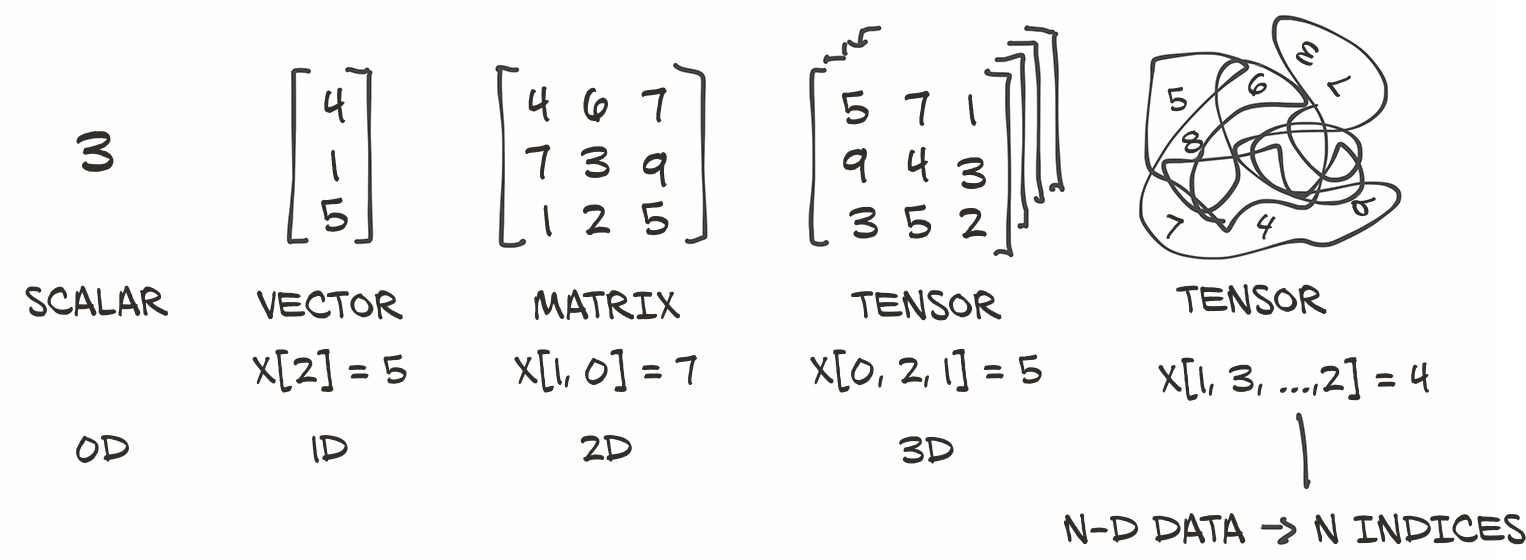
<p style='text-align: right;'>&dagger;</p>


- Not to be confused with mathematical tensors (higher dimensional analogs of scalars and vectors).
- In DL, tensors are essentially multi-dimensional arrays, very much like `numpy` multi-dimensional arrays with some additional properties:
  - Support for both CPUs and GPUs
  - Distribute operations on multiple devices or machines
  - Keep track of computation graph that created a tensor
- Tensors typically reside in contiguous memory for better performance provided by C++ (CPU) and CUDA (GPU) back-ends.
- Variety of `dtype` numeric types are supported on both CPU and GPU:
  - Commonly `torch.float32`, `torch.int64`, and `torch.bool`
  - [Others](https://pytorch.org/docs/stable/tensors.html#data-types)

### Tensor API At-A-Glance

- [Creation operations](https://pytorch.org/docs/stable/torch.html#tensor-creation-ops)
- [Indexing, slicing, joining, mutating operations](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)
- [Math operations](https://pytorch.org/docs/stable/torch.html#math-operations)
  - Further divided into _pointwise_, _reduction_, _comparison_, _spectral_, and _linear algebra (BLAS, LAPACK)_ operations.
- [Random sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)
- [Serialization](https://pytorch.org/docs/stable/torch.html#serialization)
- [Parallelism](https://pytorch.org/docs/stable/torch.html#parallelism)

(Above links lead to official [PyTorch documentation](https://pytorch.org/docs/stable/index.html))


In [2]:
# Example: Creating tensors

u = torch.tensor( range(9) )
p = torch.tensor( [ [1.0*x, 1.0*y] for x in range(3) for y in range(3) ] )
x = torch.linspace(0,1,10)

print(u)
print(u.dtype)
print(u.size())
print('\n')

print(p)
print(p.dtype)
print(p.size())
print('\n')

print(x)
print(x.size())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
torch.int64
torch.Size([9])


tensor([[0., 0.],
        [0., 1.],
        [0., 2.],
        [1., 0.],
        [1., 1.],
        [1., 2.],
        [2., 0.],
        [2., 1.],
        [2., 2.]])
torch.float32
torch.Size([9, 2])


tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])
torch.Size([10])


In [3]:
# Indexing is similar to numpy, boolean indexing is also supported

torch.manual_seed(691)
m = torch.randn(5,5)
print(m)

# Range Indexing
print(m[2:]) # row 2 onwards, all columns
#print(m[2:,3:]) # row 2 onwards, col 3 onwards
#print(m[-3:,-3:]) # third row and col from the end, till the end

#Boolean Indexing
print(m[m>0])
#print(m[(m > -0.1) & (m < 0.1)])

#m[m<0] = 0.0 
#print(m)

tensor([[ 1.1349,  0.2690, -0.0750,  1.1628, -0.3428],
        [ 0.3528,  0.1915,  1.1009,  1.1699,  0.4338],
        [-0.7930,  1.9620, -0.7446, -0.1499, -0.5176],
        [-0.3540,  1.3180,  0.0100, -0.1474,  0.2704],
        [ 0.1574, -0.3608, -1.2823, -0.1474,  1.5017]])
tensor([[-0.7930,  1.9620, -0.7446, -0.1499, -0.5176],
        [-0.3540,  1.3180,  0.0100, -0.1474,  0.2704],
        [ 0.1574, -0.3608, -1.2823, -0.1474,  1.5017]])
tensor([1.1349, 0.2690, 1.1628, 0.3528, 0.1915, 1.1009, 1.1699, 0.4338, 1.9620,
        1.3180, 0.0100, 0.2704, 0.1574, 1.5017])


In [4]:
# Named Tensors (somewhat similar to the Named Index feature in pandas)

# Currently an **experimental feature** designed to make PyTorch convenient and safe.
# Convenience: Don't need to remember which dimension is which, use names instead.
# Safety: Names much match when operating on tensors, provides safety at runtime.

torch.manual_seed(691)

# unnamed tensor, shape: [channels, rows, columns]
img = torch.rand(3,5,5) 

# unamed tensor with channels as the 2nd dim, shape: [batch, channels, rows, columns]
batch = torch.rand(2,3,5,5) 

# Convert to named tensors
img_named = img.refine_names('channels', 'rows', 'columns')
batch_named = batch.refine_names(..., 'channels', 'rows', 'columns') # Can have 'None' names
print(img_named.names)
print(batch_named.names)

# Convert to greyscale by a weighted average along the 'channels' dim.
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
grey = (img_named * weights_named.align_as(img_named)).sum('channels')
b_grey = (batch_named * weights_named.align_as(batch_named)).sum('channels')
print(b_grey.size())

('channels', 'rows', 'columns')
(None, 'channels', 'rows', 'columns')
torch.Size([2, 5, 5])


/home/ualim/.conda/envs/DL/lib/python3.11/site-packages/torch/_tensor.py:1122: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343970094/work/c10/core/TensorImpl.h:1788.)
  return super().refine_names(names)


### Tensors Under the Hood: Contiguous 1D Storage 

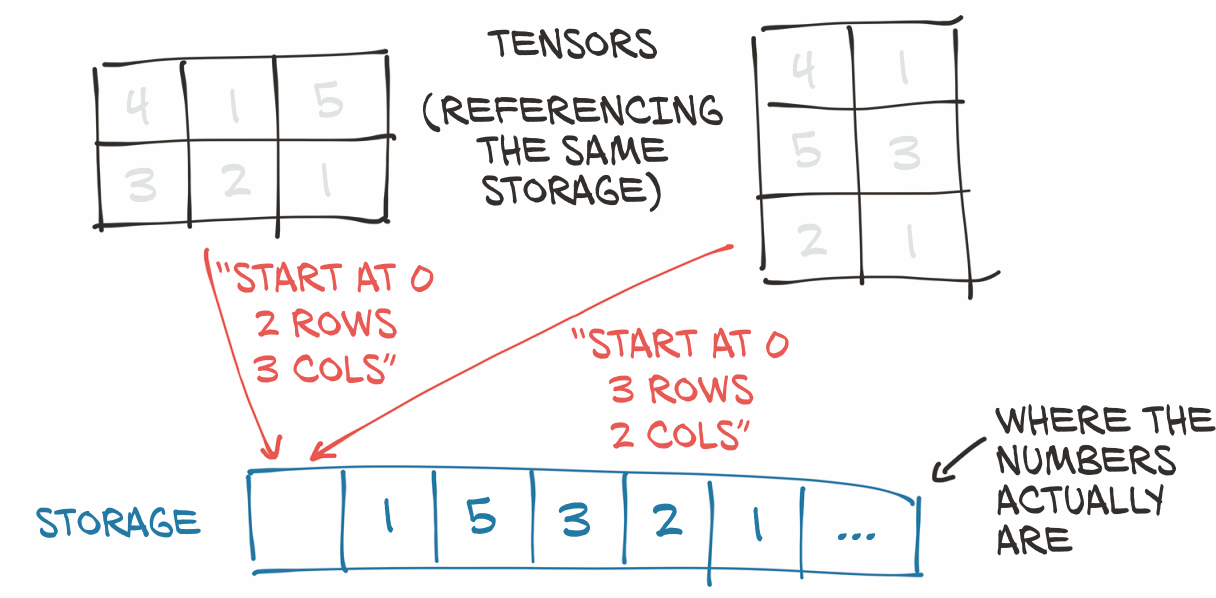
<p style='text-align: right;'>&dagger;</p>

### Tensors Under the Hood: Size, Offset, and Stride

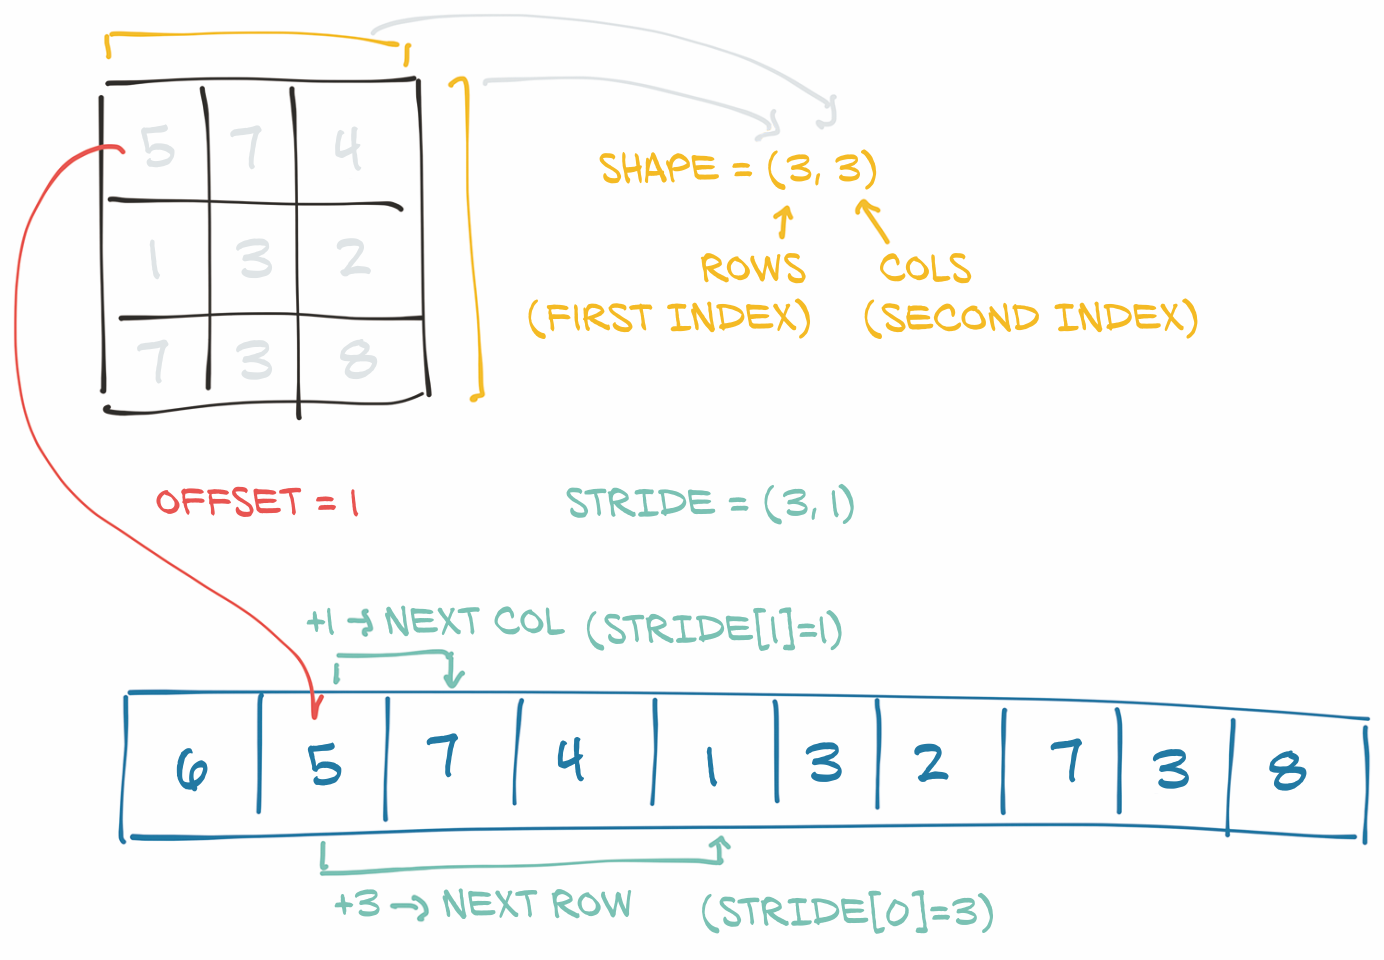
<p style='text-align: right;'>&dagger;</p>

In [5]:
# Example: Transpose/permute a tensor

points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)

points_t = points.t()
print(points_t)

print(points.storage())

print("Do the tensors share the same storage? ", id(points.untyped_storage()) == id(points_t.untyped_storage()))
print("points, size and stride: ", points.size(), points.stride())
print("points_t, size and stride: ", points_t.size(), points_t.stride())


tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor([[4., 5., 2.],
        [1., 3., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]
Do the tensors share the same storage?  True
points, size and stride:  torch.Size([3, 2]) (2, 1)
points_t, size and stride:  torch.Size([2, 3]) (1, 2)


/tmp/ipykernel_3363/738805530.py:9: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(points.storage())


## Flynn's Parallelization Taxonomy

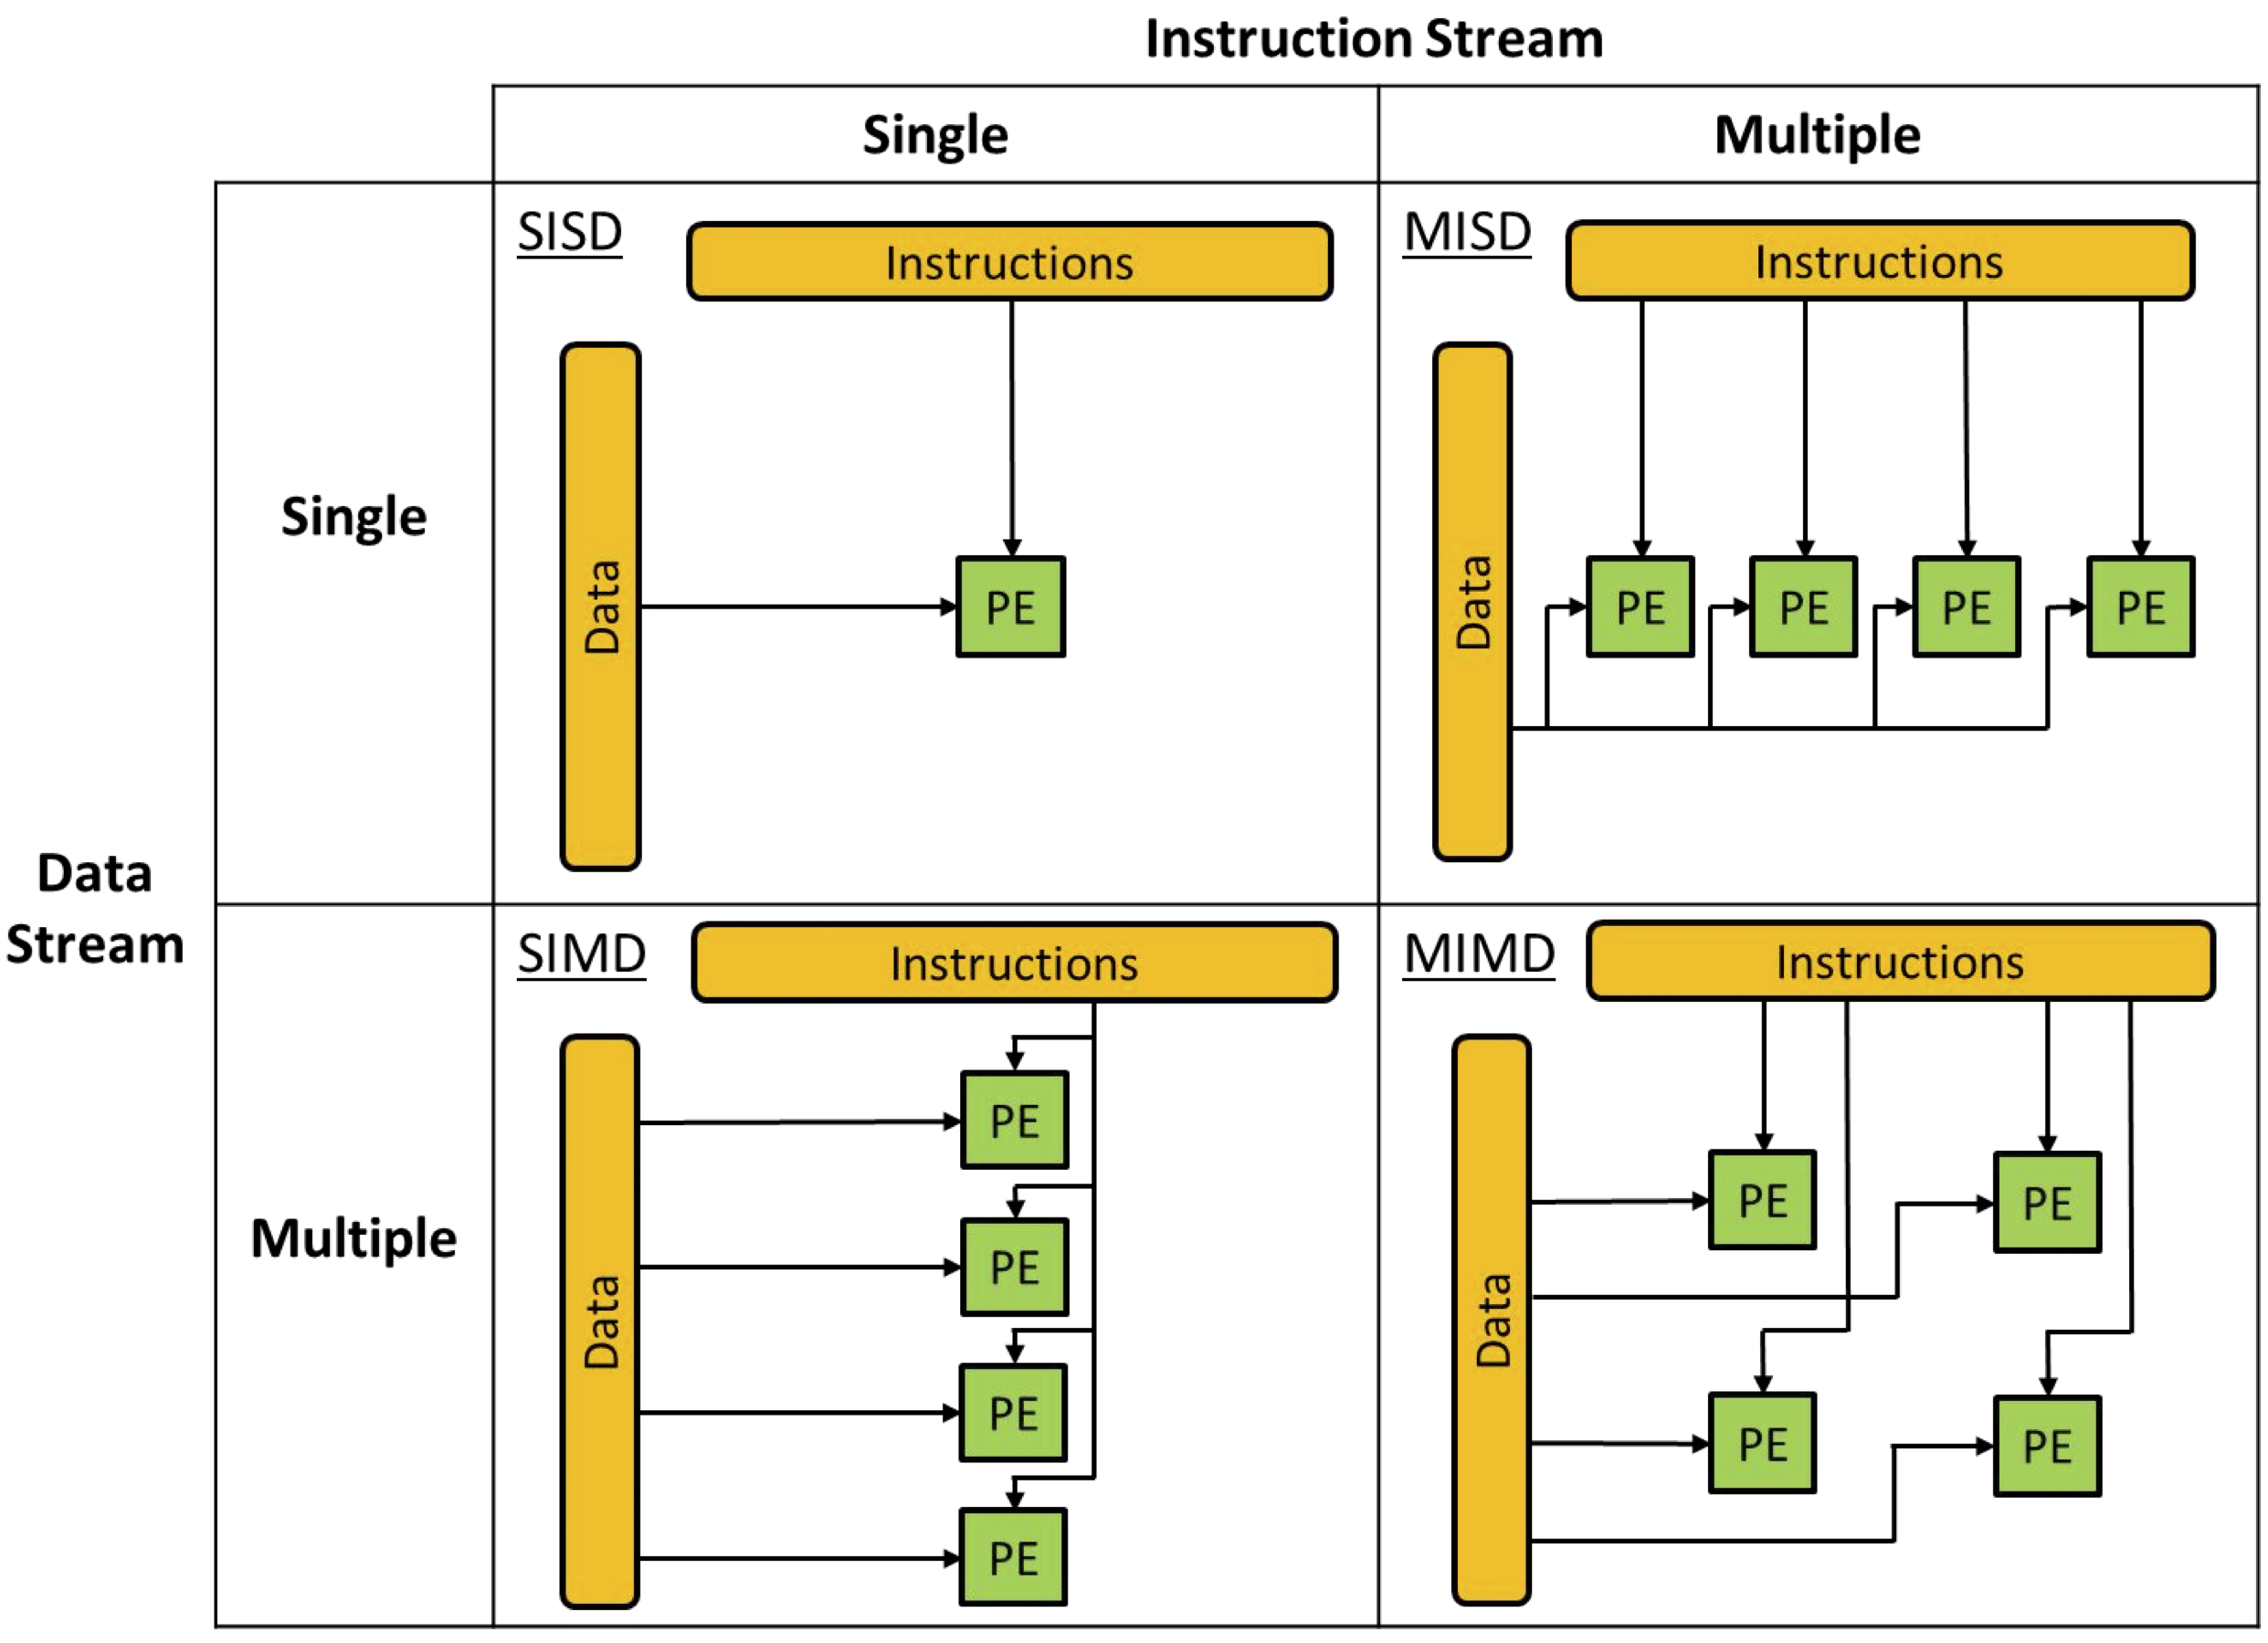

- SISD (Single Instruction, Single Data):
  Traditional von Neumann architecture.

- SIMD (Single Instruction, Multiple Data):
  Incoroporated in modern CPU and GPU architectures.

- MIMD (Multiple Instruction, Multiple Data):
  Modern multicore architectures.

- MISD (Multiple Instruction, Single Data):
  Not so common.

## GPUs | Host-Device Connection



- Most connections use the PCI Express bus on the host (PCIe v3: 16 GB/s, PCIe v4: 32 GB/s).
- Several GPUs can be connected and share data via PCIe. NVidia has also developed NVLink: a high speed interconnect for GPUs on the same host (NVLink 3.0: 300 GB/s).
- Host memory is physically separated from device memory (VRAM). Data to be processed on the GPUs needs to be transferred from host to device - a _bottleneck_.
- VRAM is also faster compared to DRAM (e.g. 480GB/s on Titan X compared to 100 GB/s on Intel Xeon workstations).

## GPUs | Architecture Overview



- A GPU consists of thousands of lightweight cores organized in a hierarchical fashion:
  - Graphics Processing Clusters (GPCs)
  - Streaming Multiprocessors (SMs)
  - Lower level compute units, load and store units (LDST), special function units (SFU).
- Current NVidia GPUs have special purpose tensor cores.
- SIMD design - cores execute the same instructions on different pieces of data.

In [6]:
# Tensors on the GPU

N = int(1e8)
x_c = torch.randn(N)

# Can create a tensor directly on the GPU...
x_g = torch.randn(N, device='cuda:0')

# ... or copy from CPU to GPU
#x_g = x_c.to(device='cuda:0')

In [7]:
# Time simple summation

# 100 runs on the CPU
%timeit -n100 -r1 torch.sum(x_c)


# Careful with timing on the GPU due to asynchronous execution behaviour.
# Need CUDA timing routines.
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

# 100 runs on the GPU
start.record()
for i in range(100):
    torch.sum(x_g)
end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print(start.elapsed_time(end) / 100, " ms")  # milliseconds

8.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
0.6798336029052734  ms


## AutoGrad

- In PyTorch, `torch.autograd` computes gradients automatically (_if requested_) by keeping track of operations performed on tensors via a computational graph.

- In particular, PyTorch implements _symbol-to-number_ differentiation for a computational node and gradients are computed via _reverse mode_ automatic differentiation. 

- For real-valued functions $f$ and $g$, suppose $y = g(x)$ and $z = f(g(x)) = f(y)$. The chain rule gives us:
$$
\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}
$$

- In the more general case, suppose $z$ is a scalar value such that:
  $z = f(\mathbf{y})$ and $\mathbf{y} = g(\mathbf{x})$
  where $\mathbf{x} \in \mathbb{R}^m $ and $\mathbf{y} \in \mathbb{R}^n$ are _flattened_ tensors. The chain rule for tensors is given by:
  
  $$
  \frac{\partial z}{\partial x_i} = \sum_j \frac{\partial z}{\partial y_j} \frac{\partial y_j}{\partial x_i},
  $$
  which can be written more compactly as:
  $$
  \nabla_{\mathbf{x}}z = \mathbf{J}_{\mathbf{x}\rightarrow\mathbf{y}}^T \cdot \nabla_{\mathbf{y}} z,
  $$
  where $\mathbf{J}_{\mathbf{x}\rightarrow\mathbf{y}}$ is the $n \times m$ Jacobian matrix of $g$.

### Back-Propagation

Given the Jacobian-gradient form of the chain rule and a computational graph, the back-propagation algorithm becomes simple. To obtain the gradient of a scalar output $z$ with respect to an ancestor $\mathbf{x}$:

1. Start with the gradient of $z$ with respect to itself (i.e. 1).
2. Update gradient by multiplying with the Jacobian of the operation that produced $z$.
3. Traverse backwards and perform a Jacobian-gradient product at each computational node.
4. If a parent can be reached by two or more paths from $z$, simply sum the gradients from the different paths.


#### Example

Let's compute the gradient of

$$
y = \sum_i \sin(2 \pi t_i^2).
$$

The analytical derivative is given by (via the chain rule):
$$
\frac{\partial y}{\partial t_i} = 4 \pi t_i \cos(2 \pi t_i^2)
$$

In [8]:
t = torch.linspace(0,1,100, requires_grad=True)
x = 2*torch.pi*t*t
y = torch.sin(x)
z = y.sum()

#inspect computation graph
print("z grad function: ", z.grad_fn, ", is leaf: ", z.is_leaf)
print("y grad function: ", y.grad_fn, ", is leaf: ", y.is_leaf)
print("x grad function: ", x.grad_fn, ", is leaf: ", x.is_leaf)
print("t grad function: ", t.grad_fn, ", is leaf: ", t.is_leaf)

z grad function:  <SumBackward0 object at 0x7f7ef74e6f50> , is leaf:  False
y grad function:  <SinBackward0 object at 0x7f7e22083580> , is leaf:  False
x grad function:  <MulBackward0 object at 0x7f7ef74e6f50> , is leaf:  False
t grad function:  None , is leaf:  True


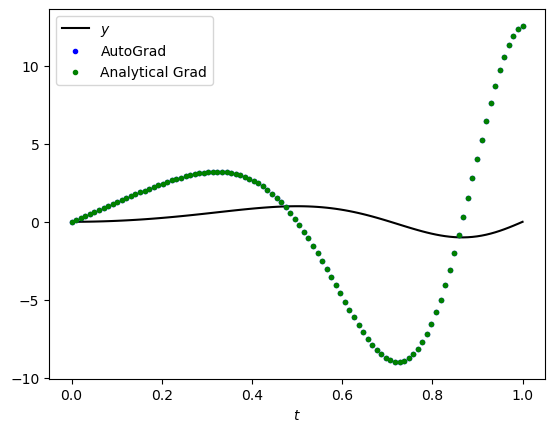

In [9]:
# Call backward to trigger backprop
z.backward()

plt.plot( t.detach(), y.detach(),  'k-', label='$y$')
plt.plot( t.detach(), t.grad, 'b.', label='AutoGrad' )
plt.plot( t.detach(), (4 * torch.pi*t*torch.cos(2*torch.pi*t*t)).detach(), 'g.', label='Analytical Grad')
plt.xlabel('$t$')
plt.legend()
plt.show()


### Example: Cubic Spline Regression

Problem: Fit a uniform cubic B-spline regression model to data $(x_i, y_i)$ where $x_i$ are random samples in the interval $[0,1]$ and the $y_i$ are corresponding function values. 

- The uniform cubic B-spline is a piecewise polynomial basis function defined for $-2 \le x \le 2$ as: 

$$ B(x) = 
\begin{cases}
\frac{1}{6} \left(4 + 3x^2(\lvert x \rvert-2)\right) & 0\leq \lvert x \rvert <1 \\
 -\frac{1}{6} (\lvert x \rvert -2)^3 & 1\leq \lvert x \rvert \leq 2 
\end{cases}
$$ 


- Use $N$ equally spaced cubic B-splines in the interval [0,1]. The fitting function is given by: 

  $$
  f(x) = \sum_{i=0}^{N-1} c_i B\left(x (N-1) - i \right).
  $$ 


- Find coefficients $c_i$ that minimize the cost function:
  $$
  \sum_i (f(x_i) - y_i)^2
  $$
  
- For this example, we'll fit synthetic data generated from $y(x) = \sin(2 \pi \mu x^2)$, where $\mu$ is a parameter that controls the oscillatory behaviour of the data.
  

In [10]:
# Let's see what impact the parameter mu has on the function

def plot(mu):
    x = np.linspace(0, 1, 256)
    y = np.sin(2 * np.pi * mu * x * x)
    plt.plot(x, y)

interact(plot, mu = widgets.IntSlider(value=1, min=1, max=5, step=1))

interactive(children=(IntSlider(value=1, description='mu', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot(mu)>

In [11]:
# Branch-free vectorized function to evaluate cubic B-spline. 
# Assuming tensors are on CPU
def B(t_x):
    t_o = torch.zeros(t_x.size())
    m1 = (0 <= torch.abs(t_x)) & (torch.abs(t_x) < 1)
    m2 = (1 <= torch.abs(t_x)) & (torch.abs(t_x) < 2)
    t_o[m1] = 1/6 * ( 4 + 3 * t_x[m1]**2 * (torch.abs(t_x[m1]) - 2) )
    t_o[m2] = -1/6 * (torch.abs(t_x[m2]) - 2)**3
    return t_o
                                    

# Evaluating the cubic B-spline model (through provided coefficients t_c)
# at arbitrary locations (t_x)
def forward(t_c, t_x, N):
    # Construct an m (no. of data points) x n (no. of coefficients) evaluation matrix (as a tensor)
    M = t_x.size()[0]
    t_h = torch.arange(N)
    t_M = (N-1)*t_x.repeat(N, 1).t() - t_h.repeat(M,1)
    return torch.matmul(B(t_M), t_c)

In [12]:
# Fitting to some synthetic data

# Generate synthetic data at random location

M = 100 # No. of data points
N = 10 # No. of B-spline coefficients

mu = 1

# Keep the same seed so that we can investigate the
# effect of changing M and N
torch.manual_seed(691) 
x = torch.rand(M)
truth = lambda t: torch.sin(2 * torch.pi * mu * t**2)
y_truth = truth(x)


# The coefficients that need to be learned
c = torch.randn(N, requires_grad=True)


# The actual gradient descent loop
learning_rate = torch.tensor(1e-1)
for epoch in range(1,1000+1):   
        y_pred = forward(c, x, N)
        loss = torch.mean((y_pred - y_truth)**2)
        
        if epoch%100 == 0:
            print( epoch,  loss.item() )
        
        loss.backward()
        with torch.no_grad():
            c -= learning_rate * c.grad
            c.grad = None

100 0.16061672568321228
200 0.04217243194580078
300 0.017692461609840393
400 0.008806003257632256
500 0.004769786726683378
600 0.002781736198812723
700 0.0017540444387122989
800 0.0011971453204751015
900 0.0008791278232820332
1000 0.0006871072109788656


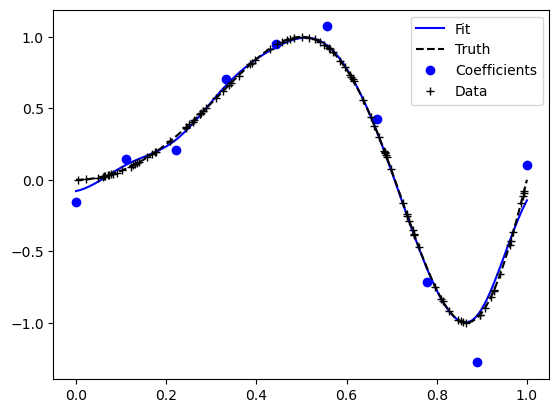

In [13]:
t = torch.linspace(0,1,M)
plt.plot( t.detach(), forward(c, t, N).detach(),  'b-', label='Fit')
plt.plot( t.detach(), truth(t).detach() ,  'k--', label='Truth')
plt.plot( torch.linspace(0,1,N), c.detach(),  'bo', label='Coefficients')
plt.plot( x.detach(), y_truth.detach(),  'k+', label='Data')

plt.legend()
plt.show()

## NN Background | An Artificial Neuron

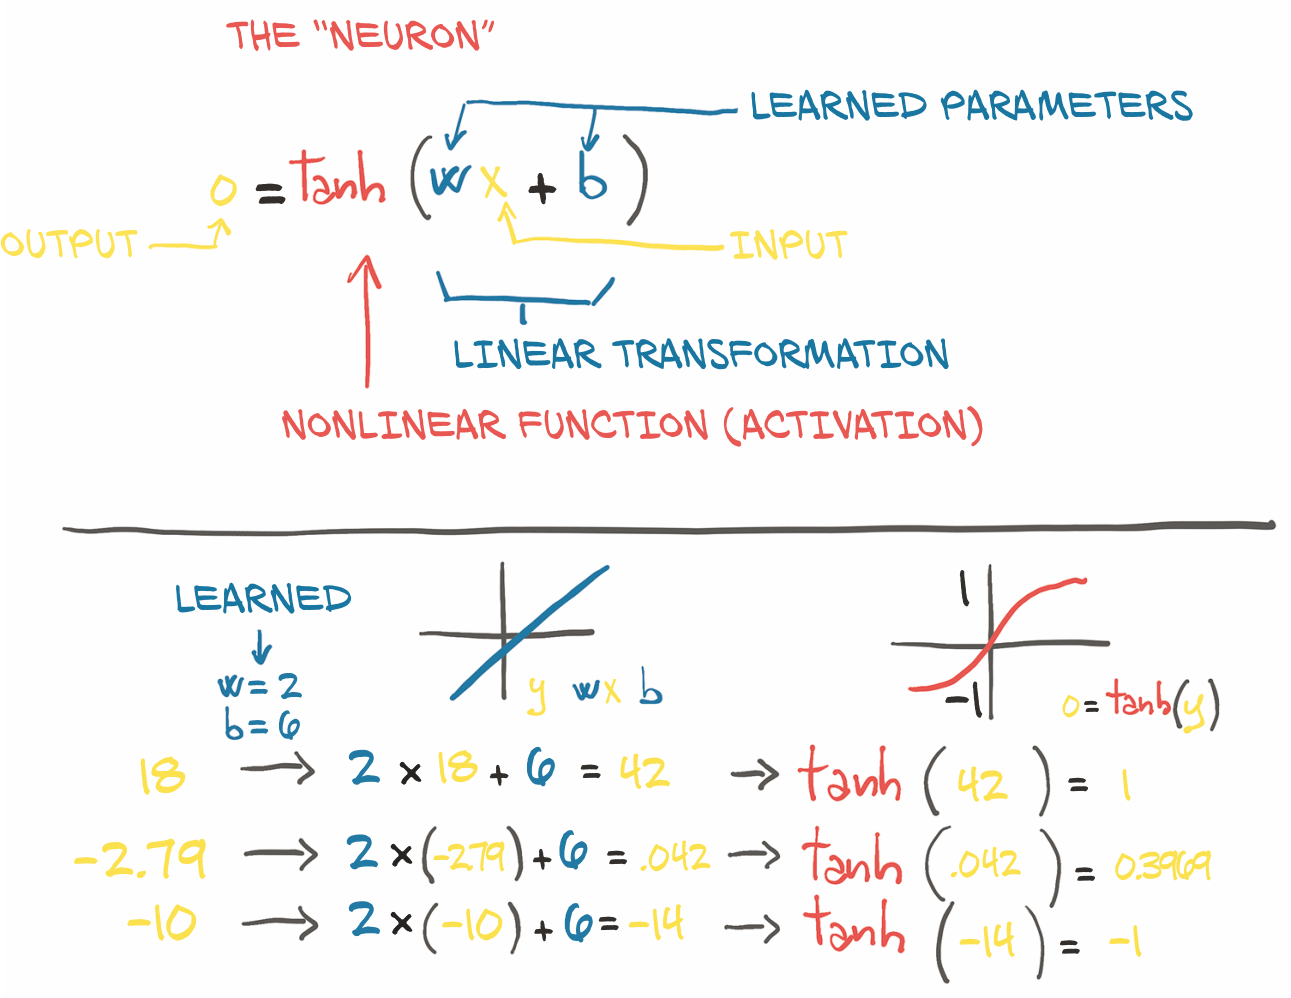
<p style='text-align: right;'>&dagger;</p>

### Multilayer NN
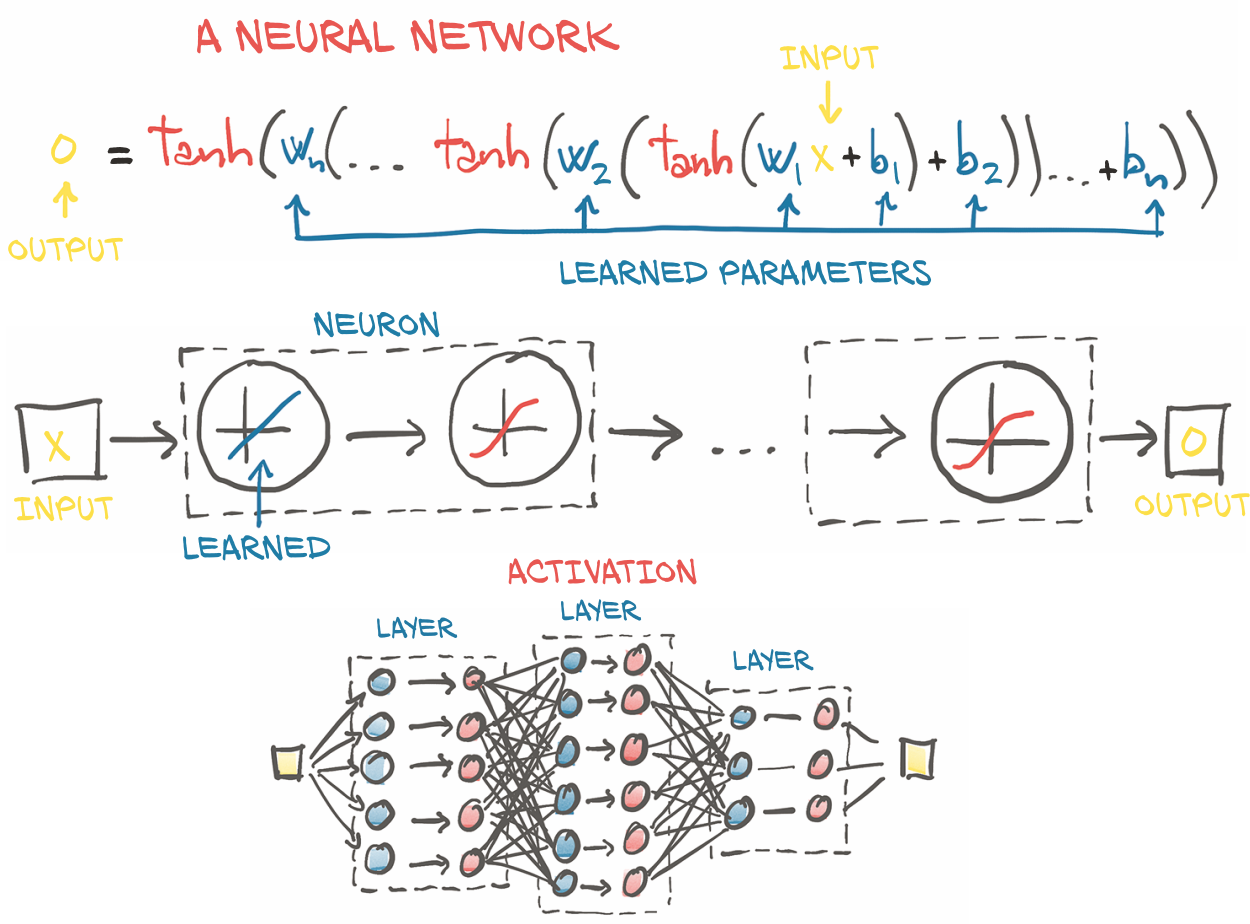
<p style='text-align: right;'>&dagger;</p>

### The Learning Process
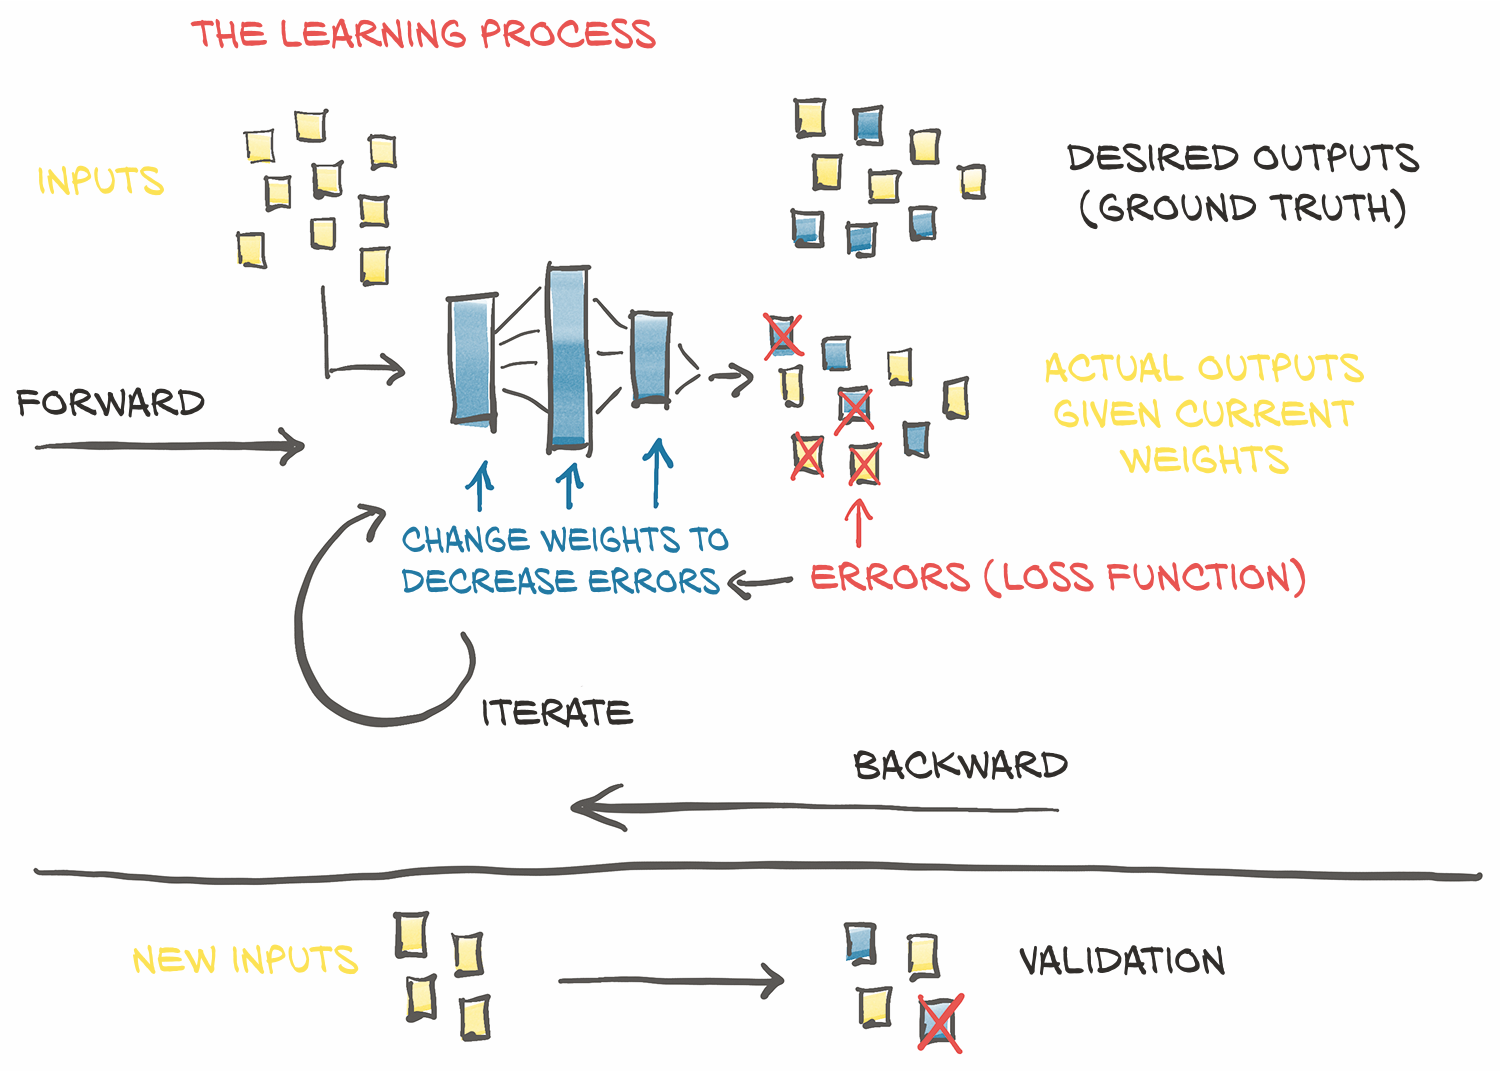
<p style='text-align: right;'>&dagger;</p>

## Neural Network Models in PyTorch

- `torch.nn` submodule is dedicated to neural networks.
- Building blocks are called _modules_. `nn.Module` serves as a base class for other types of architectures such as `nn.Linear` and `nn.conv2d`.
- Modules can be called as functions which take model inputs as function parameters.
- Tensors are expected to have _batches_ as the first (zeroth) dimension. 
- Modules have associated parameters which are tensors that keep track of gradients.
- `torch.optim` works in conjunction with `torch.nn` and implements various optimization algorithms.




In [14]:
# Build a simple sequential NN regression model with one hidden layer

from collections import OrderedDict

# size of hidden layer
SIZE_H = 5

seq_model = nn.Sequential( OrderedDict([
    ('hidden', nn.Linear(1,SIZE_H)), 
    ('activation', nn.Tanh()),
    ('output', nn.Linear(SIZE_H,1))
]))

# inspect parameters
[(name,param) for name, param in seq_model.named_parameters()]

[('hidden.weight',
  Parameter containing:
  tensor([[-0.8902],
          [ 0.0530],
          [-0.5677],
          [-0.7564],
          [-0.9211]], requires_grad=True)),
 ('hidden.bias',
  Parameter containing:
  tensor([-0.2247, -0.3216,  0.1522, -0.2864,  0.6908], requires_grad=True)),
 ('output.weight',
  Parameter containing:
  tensor([[ 0.1631, -0.2330, -0.1215, -0.2580,  0.1263]], requires_grad=True)),
 ('output.bias',
  Parameter containing:
  tensor([-0.2193], requires_grad=True))]

In [15]:
# Do some training

# For mu=1, this converges but much more slowly compared to the spline model.

loss_fn = nn.MSELoss()
optimizer = optim.SGD(seq_model.parameters(), lr=0.1)

for epoch in range(1, 100000+1):
    y_pred = seq_model(x.unsqueeze(1))
    loss_train = loss_fn(y_pred, y_truth.unsqueeze(1))
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if epoch%10000 == 0:
            print( epoch,  loss_train.item() )

10000 0.0034307308960705996
20000 0.0024575931020081043
30000 0.0016117490595206618
40000 0.0011172591475769877
50000 0.0008172312518581748
60000 0.0006113916751928627
70000 0.00047726690536364913
80000 0.0003844203311018646
90000 0.00031590572325512767
100000 0.0002603168832138181


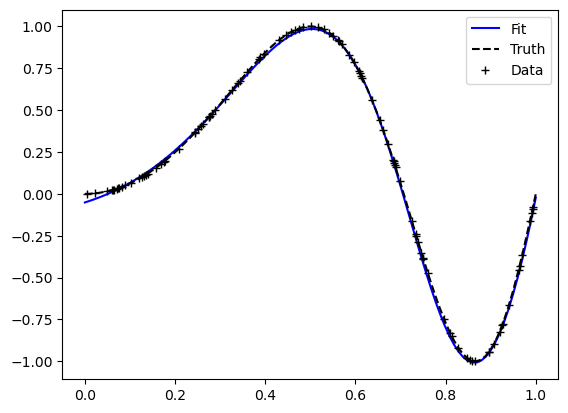

In [16]:
t = torch.linspace(0,1,M)
plt.plot( t.detach(), seq_model(t.unsqueeze(1)).detach(),  'b-', label='Fit')
plt.plot( t.detach(), truth(t).detach() ,  'k--', label='Truth')
plt.plot( x.detach(), y_truth.detach(),  'k+', label='Data')

plt.legend()
plt.show()

### Exercise

In the regression examples above (using both a cubic spline regression and a NN regression), we used $\mu=1$. Repeat the experiments with a larger value of $\mu$.
- Which model is able to represent the underlying data more faithfully?
- Which model is more efficient (same accuracy with fewer parameters)?



## Example: Fully Connected Autoencoder for MNIST Digits Data 

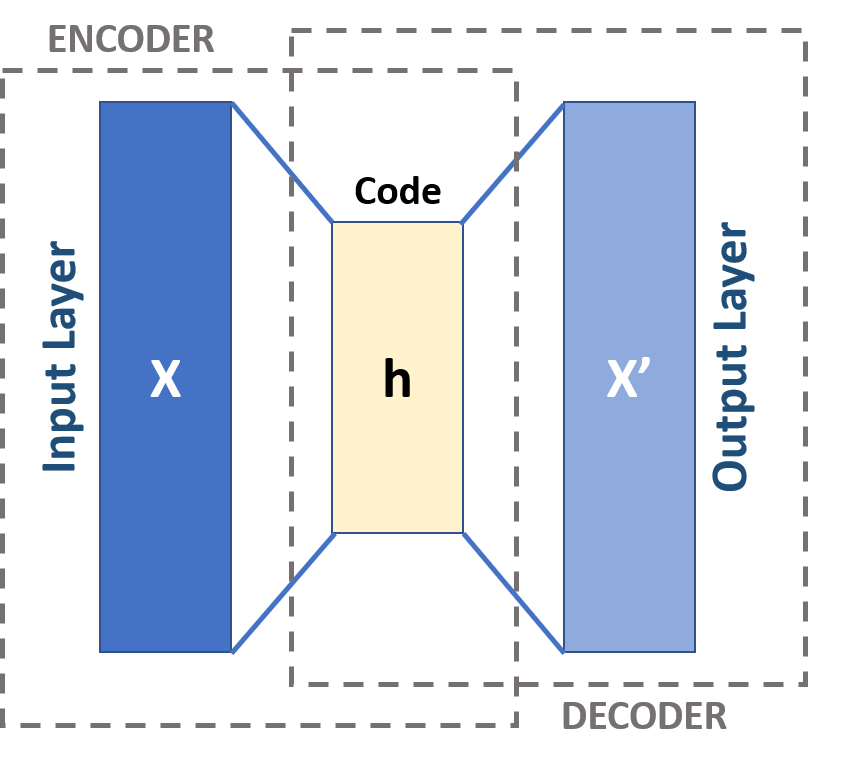


<p style='text-align: left; font-size:50%'>Image from <a href='https://commons.wikimedia.org/wiki/File:Autoencoder_schema.png'>Wikimedia Commons</p>
    
- Autoencoders are _unsupervised_ neural network models consisting of:
    - An encoder that transform input data to an encoded representation in a latent space.
    - A decoder that reconstructs the input from the code.

- Various uses:
    - Image compression, dimensionality reduction: The latent representation has a lower dimension compared to the input.
    - Sparse encoding: the latent representation is sparse.
    - Variational autoencoders: learn a regularized distribution of data in the latent space which can be easily sampled to generate new data (for generative models). 

In [17]:
# Code adapted from:
# https://bytepawn.com/building-a-pytorch-autoencoder-for-mnist-digits.html

# Architecture inspiration:
# https://towardsdatascience.com/generate-mnist-digits-using-shallow-and-deep-autoencoders-in-keras-fb011dd3fec3

class ShallowAutoencoder(nn.Module):
    def __init__(self):
        super(ShallowAutoencoder,self).__init__()
        self.encoder = nn.Sequential(
            # 28 x 28 = 784
            nn.Linear(784, 16),
            nn.Tanh()
            )
        self.decoder = nn.Sequential(
            nn.Linear(16, 784),
            nn.Sigmoid()
            )
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return dec

In [34]:
# Gather and preprocess the MNIST dataset
num_epochs = 50
batch_size = 1024

# Training on the GPU
#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
# transform to convert images to tensors
# normalize them by mean and standard deviation
transform = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize((0.1307,), (0.3081,)),
    tv.transforms.Lambda(lambda x: torch.flatten(x))
])

# Grab the data from torchvision.
# More details about MNIST data here: 
trainset = tv.datasets.MNIST( root='./data', train=True, download=True, transform=transform)

kwargs = {'num_workers': 4, 'pin_memory': True} if device=='cuda' else {}
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, 
                                           **kwargs)

In [35]:
print("Training on device:", device)

# Create and move the model to GPU if available
model = ShallowAutoencoder().to(device=device)

# Optimizer parameters
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()


# Logging for Tensorboard
log_dir=f"runs/device:{device},bs:{batch_size},lr:{lr}"
writer = SummaryWriter(log_dir=log_dir)

# The training loop
for epoch in range(1, num_epochs+1):
    for imgs, _ in train_loader:
        imgs = imgs.to(device=device)
        outputs = model(imgs)
        loss = loss_fn(outputs, imgs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss: {:.4f}'.format(epoch, num_epochs, loss.item()))
    writer.add_scalar("Loss/train", loss, epoch)
writer.flush()

Training on device: cpu
epoch [1/50], loss: 1.0071
epoch [2/50], loss: 0.9062
epoch [3/50], loss: 0.8746
epoch [4/50], loss: 0.8397
epoch [5/50], loss: 0.8254
epoch [6/50], loss: 0.8048
epoch [7/50], loss: 0.8085
epoch [8/50], loss: 0.7975
epoch [9/50], loss: 0.7969
epoch [10/50], loss: 0.7848
epoch [11/50], loss: 0.7660
epoch [12/50], loss: 0.7692
epoch [13/50], loss: 0.7589
epoch [14/50], loss: 0.7613
epoch [15/50], loss: 0.7588
epoch [16/50], loss: 0.7481
epoch [17/50], loss: 0.7418
epoch [18/50], loss: 0.7361
epoch [19/50], loss: 0.7270
epoch [20/50], loss: 0.7276
epoch [21/50], loss: 0.7177
epoch [22/50], loss: 0.7095
epoch [23/50], loss: 0.7031
epoch [24/50], loss: 0.6911
epoch [25/50], loss: 0.7009
epoch [26/50], loss: 0.6873
epoch [27/50], loss: 0.6987
epoch [28/50], loss: 0.6944
epoch [29/50], loss: 0.6803
epoch [30/50], loss: 0.6818
epoch [31/50], loss: 0.6777
epoch [32/50], loss: 0.6576
epoch [33/50], loss: 0.6692
epoch [34/50], loss: 0.6641
epoch [35/50], loss: 0.6626
epoch

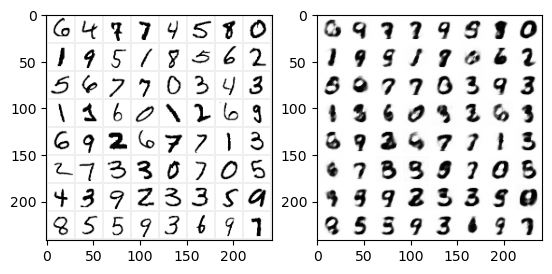

In [36]:
# Show images from first batch and write to tensorboard
# Also write model to tensorboard for visualization
# This part is on the CPU

dataiter = iter(train_loader)
images, labels = next(dataiter)

model = model.to('cpu')
writer.add_graph(model, images)


# Use the first 64
N_IMAGES = 64
images = images[0:N_IMAGES,:]

images.resize_([N_IMAGES, 1, 28,28])
# Create a grid of images
img_grid = tv.utils.make_grid(images, scale_each=True)
img_grid = img_grid.mean(dim=0)
writer.add_image('Images from first batch', img_grid, dataformats='HW')

fig, axarr = plt.subplots(1,2)
axarr[0].imshow(img_grid.numpy(), cmap="Greys")

# Show encoded-decoded images from first batch and write to tensorboard
images.resize_([N_IMAGES, 28*28])
images_a = model(images).detach()
images_a.resize_([N_IMAGES, 1, 28,28])
# Create a grid of images
img_grid = tv.utils.make_grid(images_a)
img_grid = img_grid.mean(dim=0)
writer.add_image('Encoded-decoded images from first batch', img_grid, dataformats='HW')
axarr[1].imshow(img_grid.numpy(), cmap="Greys")

writer.flush()
writer.close()
plt.show()

### Exercise

The example above used a shallow autoencoder. Introducing additional hidden layers can potentially improve performance. 
- Train a deep fully connected autoencoder for the MNIST dataset based on the architecture proposed [here](https://towardsdatascience.com/generate-mnist-digits-using-shallow-and-deep-autoencoders-in-keras-fb011dd3fec3). 
- Log both training and testing errors using tensorboard.
- Experiment with different number of layers and learning rates.
- See if the latent space be reduced even more. Reducing it down to two or three dimensions will let you easily visualize it.

## Not just for NNs
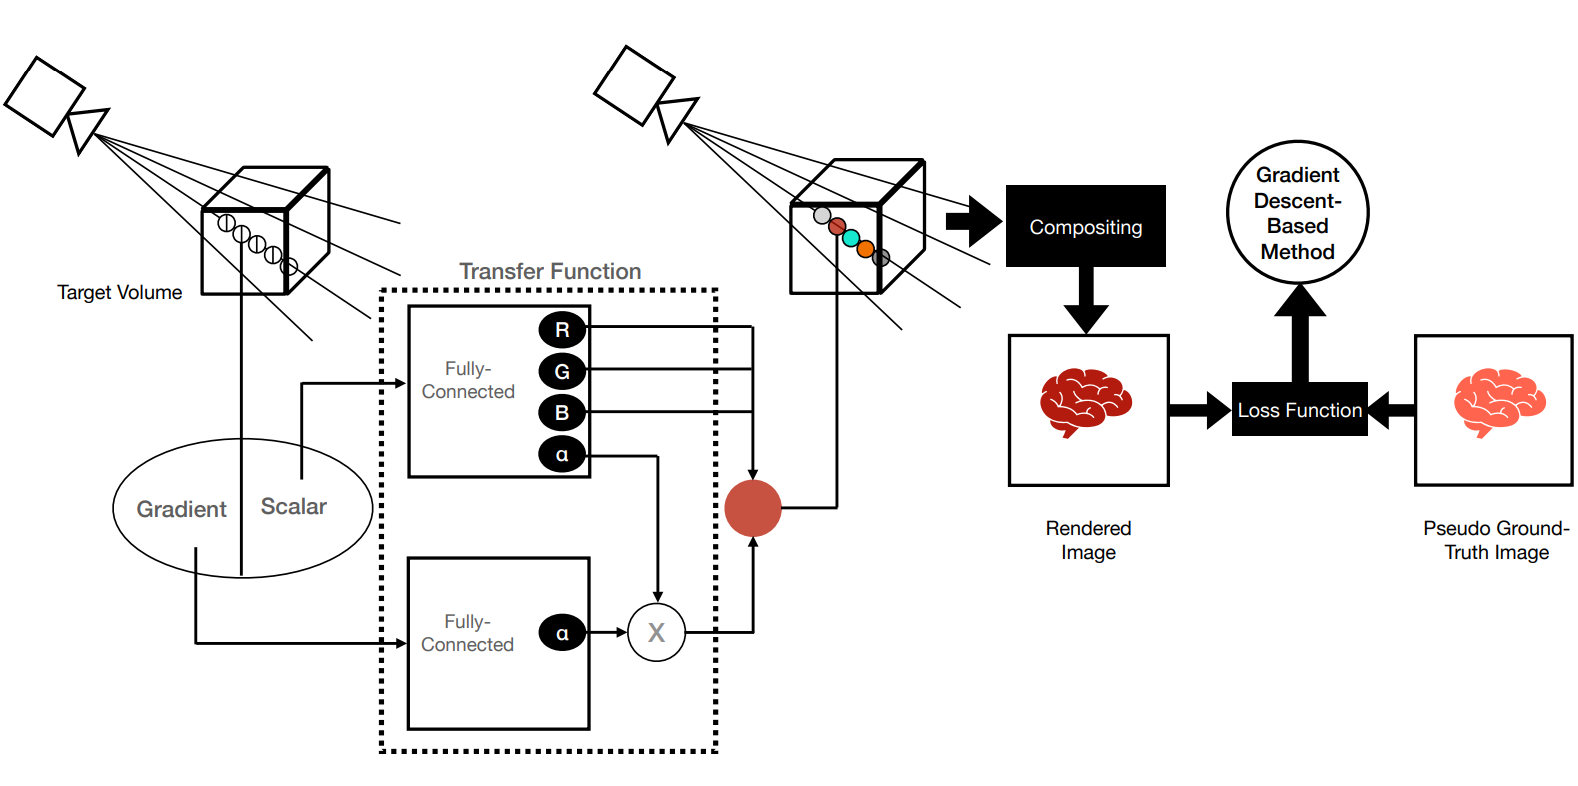
Differentiable Volume Rendering: Learning a transfer function
